# Import libraries and download packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Read and clean data

In [ ]:
# read data
df= pd.read_csv('sentiment_analysis.csv', sep=",")
df.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving pa...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @C...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate !? -.... https://t.co/AKnIVEGUOe,1
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for students &amp; teachers. Good luck and have a Succ...,1
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 https:/...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKXbN3Zhtd,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorable experience in Barcelona SEE INTERVIEW HERE: http...",1


In [ ]:
# function to process tweets
def process_tweet(text):
  # change to lowercase
  text=text.lower()
  # remove URLs
  text=re.sub('((www\.[\s]+)|(https?://[^\s]+))','',text)
  # remove user tags
  text=re.sub('@[^\s]+','',text)
  # remove extra space
  text=re.sub('[\s]+',' ',text)
  # replace hashtags with words
  text=re.sub(r'#([^\s]+)',r'\1',text)
  # remove punctuation
  text= "".join([word for word in text if word not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  # tokenize
  text = re.split('\W+', text)
  # remove stopwords 
  text = [word for word in text if word not in stopword]
  # lemmatize
  text = [wn.lemmatize(word) for word in text]
  # reverse tokenization
  text= " ".join([word for word in text if word not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  return text

In [ ]:
# process tweets
df['processed_text'] = df['text'].apply(lambda x: process_tweet(x))
df.head(10)

,ID,text,label,processed_text
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https...,1,josh jenkins looking forward tab breeder crown super sunday
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all o...,1,rt congratulation pakistan becoming notestteam world odds jipakzindabadrallies
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving pa...",1,rt september taking maine mendoza surprise thanksgiving party threw fan
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. ...",1,rt newly painted wall thanks million custodial painter summer great job ladiesecproud
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @C...,1,rt excited announce july feschotte lab relocating mbg
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate !? -.... https://t.co/AKnIVEGUOe,1,rt excited illuminate
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for students &amp; teachers. Good luck and have a Succ...,1,rt firstdayofschool student amp teacher good luck successful school year educationmatters ht
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 https:/...,1,rt srk kajol making ddlj song greatest ever
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKXbN3Zhtd,1,rt im happy
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorable experience in Barcelona SEE INTERVIEW HERE: http...",1,rt kathryn daniel share memorable experience barcelona see interview


In [ ]:
# data split
y=df['label']
document=df['processed_text']
document_train, document_test, y_train, y_test = train_test_split(document, y, test_size=0.2, random_state=0)

# Term Frequency

## Feature engineering

In [ ]:
# term frequency feature selection
vectorizer_tf = TfidfVectorizer(use_idf=False)
vectorizer_tf.fit(document_train)
X_train_tf=vectorizer_tf.transform(document_train)
X_test_tf=vectorizer_tf.transform(document_test)
features_tf = vectorizer_tf.get_feature_names_out()

## Logit regression

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
from sklearn.linear_model import LogisticRegression
# Original param_grid commented out to avoid re-run
#param_grid = {'C':[0.01,0.03,0.1,0.3,1,3,10,30,100],
#              'solver' : ['liblinear','lbfgs','liblinear','sag','saga']}
# Optimal param hard-coded to show results
param_grid = {'C':[10],
              'solver' : ['sag']}
clf_lr = LogisticRegression(max_iter=1000)
gs_lr = GridSearchCV(estimator = clf_lr, param_grid = param_grid,scoring='f1',verbose=3)
clf_lr = gs_lr.fit(X_train_tf, y_train)
print('LR best params:',gs_lr.best_params_)
print('Best CV score:',gs_lr.best_score_)
test_score=gs_lr.score(X_test_tf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................C=10, solver=sag;, score=0.981 total time=  12.7s
[CV 2/5] END ..................C=10, solver=sag;, score=0.981 total time=  13.1s
[CV 3/5] END ..................C=10, solver=sag;, score=0.981 total time=  12.0s
[CV 4/5] END ..................C=10, solver=sag;, score=0.981 total time=  10.9s
[CV 5/5] END ..................C=10, solver=sag;, score=0.981 total time=  12.0s
LR best params: {'C': 10, 'solver': 'sag'}
Best CV score: 0.9808287192490612
Test score: 0.9814207061075132


## k-NN

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 3-fold crossvalidation and f1 score
from sklearn.neighbors import KNeighborsClassifier
# Original param_grid commented out to avoid re-run
#param_grid = {'n_neighbors' : [1,3,5,10,15],
#        'weights' : ['uniform','distance'],
#        'metric' : ['minkowsky','euclidean']}
# Optimal param hard-coded to show results
param_grid = {'n_neighbors' : [1],
              'metric' : ['euclidean']}
clf_knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator = clf_knn, param_grid = param_grid,scoring='f1',verbose=3,cv=3)
clf_knn = gs_knn.fit(X_train_tf, y_train)
print('kNN best params:',gs_knn.best_params_)
print('Best CV score:',gs_knn.best_score_)
test_score=gs_knn.score(X_test_tf,y_test)
print('Test score:',test_score)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ...metric=euclidean, n_neighbors=1;, score=0.823 total time=10.6min
[CV 2/3] END ...metric=euclidean, n_neighbors=1;, score=0.823 total time=11.3min
[CV 3/3] END ...metric=euclidean, n_neighbors=1;, score=0.825 total time=10.5min
kNN best params: {'metric': 'euclidean', 'n_neighbors': 1}
Best CV score: 0.8235925304245546
Test score: 0.8631016760776649


## Naive Bayes

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
from sklearn.naive_bayes import MultinomialNB
param_grid = {'alpha': [0.01,0.03,0.1,0.3,1,3,10,30,100]}
clf_NB = MultinomialNB()
gs_NB = GridSearchCV(estimator = clf_NB, param_grid = param_grid,scoring='f1',verbose=3)
clf_NB = gs_NB.fit(X_train_tf, y_train)
print('NB best params:',gs_NB.best_params_)
print('Best CV score:',gs_NB.best_score_)
test_score=gs_NB.score(X_test_tf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........................alpha=0.01;, score=0.957 total time=   0.3s
[CV 2/5] END ........................alpha=0.01;, score=0.958 total time=   0.3s
[CV 3/5] END ........................alpha=0.01;, score=0.958 total time=   0.4s
[CV 4/5] END ........................alpha=0.01;, score=0.957 total time=   0.3s
[CV 5/5] END ........................alpha=0.01;, score=0.958 total time=   0.3s
[CV 1/5] END ........................alpha=0.03;, score=0.960 total time=   0.7s
[CV 2/5] END ........................alpha=0.03;, score=0.961 total time=   0.4s
[CV 3/5] END ........................alpha=0.03;, score=0.961 total time=   0.4s
[CV 4/5] END ........................alpha=0.03;, score=0.960 total time=   0.6s
[CV 5/5] END ........................alpha=0.03;, score=0.960 total time=   0.2s
[CV 1/5] END .........................alpha=0.1;, score=0.962 total time=   0.3s
[CV 2/5] END .........................alpha=0.1;,

## Decision Tree

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
from sklearn.tree import DecisionTreeClassifier
# Original param_grid commented out to avoid re-run
#param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#              'ccp_alpha': [0.1, .01, .001],
#              'max_depth' : [5, 6, 7, 8, 9, 15],
#              'criterion' :['gini', 'entropy']}
# Optimal param hard-coded to show results
param_grid = {'max_features': ['auto'],
              'ccp_alpha': [.001],
              'max_depth' : [15],
              'criterion' :['entropy']}

clf_dtc = DecisionTreeClassifier()
gs_dtc = GridSearchCV(estimator = clf_dtc, param_grid = param_grid, scoring='f1', verbose=3)
clf_dtc = gs_dtc.fit(X_train_tf, y_train)
print('DT best params:',gs_dtc.best_params_)
print('Best CV score:',gs_dtc.best_score_)
test_score=gs_dtc.score(X_test_tf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.813 total time=   2.2s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.807 total time=   2.1s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.808 total time=   2.3s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.806 total time=   2.2s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.809 total time=   2.2s
DT best params: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}
Best CV score: 0.8086901159792038
Test score: 0.8056992004171737


## XGBoost

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
import xgboost as xgb
# Original param_grid commented out to avoid re-run
#param_grid = {'colsample_bytree':[.4, .8],
#              'gamma' : [.5, 5, 50],
#              'learning_rate' : [0.05, 0.5],
#              'max_depth' : [3,10],
#              'subsample' : [.4, .8]}
# Optimal param hard-coded to show results
param_grid = {'colsample_bytree':[.8],
              'gamma' : [.5],
              'learning_rate' : [0.5],
              'max_depth' : [10],
              'subsample' : [.8]}

clf_xgb = xgb.XGBClassifier()
gs_xgb = GridSearchCV(estimator = clf_xgb, param_grid = param_grid, scoring='f1', verbose=3)
clf_xgb = gs_xgb.fit(X_train_tf, y_train)
print('XGB best params:',gs_xgb.best_params_)
print('Best CV score:',gs_xgb.best_score_)
test_score=gs_xgb.score(X_test_tf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.963 total time= 2.3min
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.965 total time= 2.2min
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.964 total time= 2.1min
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.964 total time= 2.1min
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.965 total time= 2.1min
XGB best params: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'subsample': 0.8}
Best CV score: 0.9641493567986401
Test score: 0.9654163775628205


# TFIDF

## Feature engineering

In [ ]:
# TFIDF feature selection
vectorizer_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True)
vectorizer_tfidf.fit(document_train)
X_train_tfidf=vectorizer_tfidf.transform(document_train)
X_test_tfidf=vectorizer_tfidf.transform(document_test)
features_tfidf = vectorizer_tfidf.get_feature_names_out()

## Logit regression

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
# Original param_grid commented out to avoid re-run
#param_grid = {'C':[0.01,0.03,0.1,0.3,1,3,10,30,100],
#              'solver' : ['liblinear','lbfgs','liblinear','sag','saga']}
param_grid = {'C':[10],
              'solver' : ['sag']}
clf_lr = LogisticRegression(max_iter=1000)
gs_lr = GridSearchCV(estimator = clf_lr, param_grid = param_grid,scoring='f1',verbose=3)
clf_lr = gs_lr.fit(X_train_tfidf, y_train)
print('LR best params:',gs_lr.best_params_)
print('Best CV score:',gs_lr.best_score_)
test_score=gs_lr.score(X_test_tfidf,y_test)
print('Test score:',test_score)

## k-NN

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 3-fold crossvalidation and f1 score
# Original param_grid commented out to avoid re-run
#param_grid = {'n_neighbors' : [1,3,5,10,15],
#        'weights' : ['uniform','distance'],
#        'metric' : ['minkowsky','euclidean']}
# Optimal param hard-coded to show results
param_grid = {'n_neighbors' : [1],
              'metric' : ['euclidean']}
clf_knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator = clf_knn, param_grid = param_grid,scoring='f1',verbose=3,cv=3)
clf_knn = gs_knn.fit(X_train_tfidf, y_train)
print('kNN best params:',gs_knn.best_params_)
print('Best CV score:',gs_knn.best_score_)
test_score=gs_knn.score(X_test_tfidf,y_test)
print('Test score:',test_score)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ...metric=euclidean, n_neighbors=1;, score=0.687 total time=10.3min
[CV 2/3] END ...metric=euclidean, n_neighbors=1;, score=0.686 total time= 9.9min
[CV 3/3] END ...metric=euclidean, n_neighbors=1;, score=0.689 total time=10.1min
kNN best params: {'metric': 'euclidean', 'n_neighbors': 1}
Best CV score: 0.6876513321737748
Test score: 0.768981973269069


## Naive Bayes

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
param_grid = {'alpha': [0.01,0.03,0.1,0.3,1,3,10,30,100]}
clf_NB = MultinomialNB()
gs_NB = GridSearchCV(estimator = clf_NB, param_grid = param_grid,scoring='f1',verbose=3)
clf_NB = gs_NB.fit(X_train_tfidf, y_train)
print('NB best params:',gs_NB.best_params_)
print('Best CV score:',gs_NB.best_score_)
test_score=gs_NB.score(X_test_tfidf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........................alpha=0.01;, score=0.940 total time=   0.3s
[CV 2/5] END ........................alpha=0.01;, score=0.940 total time=   0.3s
[CV 3/5] END ........................alpha=0.01;, score=0.941 total time=   0.3s
[CV 4/5] END ........................alpha=0.01;, score=0.940 total time=   0.3s
[CV 5/5] END ........................alpha=0.01;, score=0.940 total time=   0.3s
[CV 1/5] END ........................alpha=0.03;, score=0.943 total time=   0.3s
[CV 2/5] END ........................alpha=0.03;, score=0.942 total time=   0.3s
[CV 3/5] END ........................alpha=0.03;, score=0.944 total time=   0.3s
[CV 4/5] END ........................alpha=0.03;, score=0.943 total time=   0.3s
[CV 5/5] END ........................alpha=0.03;, score=0.943 total time=   0.3s
[CV 1/5] END .........................alpha=0.1;, score=0.946 total time=   0.3s
[CV 2/5] END .........................alpha=0.1;,

## Decision Tree

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
# Original param_grid commented out to avoid re-run
#param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#              'ccp_alpha': [0.1, .01, .001],
#              'max_depth' : [5, 6, 7, 8, 9, 15],
#              'criterion' :['gini', 'entropy']}
# Optimal param hard-coded to show results
param_grid = {'max_features': ['auto'],
              'ccp_alpha': [.001],
              'max_depth' : [15],
              'criterion' :['entropy']}

clf_dtc = DecisionTreeClassifier()
gs_dtc = GridSearchCV(estimator = clf_dtc, param_grid = param_grid, scoring='f1', verbose=3)
clf_dtc = gs_dtc.fit(X_train_tfidf, y_train)
print('DT best params:',gs_dtc.best_params_)
print('Best CV score:',gs_dtc.best_score_)
test_score=gs_dtc.score(X_test_tfidf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.806 total time=   2.3s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.812 total time=   2.2s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.811 total time=   2.2s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.807 total time=   2.6s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=15, max_features=auto;, score=0.806 total time=   2.2s
DT best params: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}
Best CV score: 0.8083447219236749
Test score: 0.805854802207762


## XGBoost

In [ ]:
# Hyperparameter tuning using grid search
# measure performance using 5-fold crossvalidation and f1 score
# Original param_grid commented out to avoid re-run
#param_grid = {'colsample_bytree':[.4, .8],
#              'gamma' : [.5, 5, 50],
#              'learning_rate' : [0.05, 0.5],
#              'max_depth' : [3,10],
#              'subsample' : [.4, .8]}
# Optimal param hard-coded to show results
param_grid = {'colsample_bytree':[.8],
              'gamma' : [.5],
              'learning_rate' : [0.5],
              'max_depth' : [10],
              'subsample' : [.8]}

clf_xgb = xgb.XGBClassifier()
gs_xgb = GridSearchCV(estimator = clf_xgb, param_grid = param_grid, scoring='f1', verbose=3)
clf_xgb = gs_xgb.fit(X_train_tfidf, y_train)
print('XGB best params:',gs_xgb.best_params_)
print('Best CV score:',gs_xgb.best_score_)
test_score=gs_xgb.score(X_test_tfidf,y_test)
print('Test score:',test_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.963 total time= 2.6min
[CV 2/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.965 total time= 2.6min
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.965 total time= 2.6min
[CV 4/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.964 total time= 2.6min
[CV 5/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.5, max_depth=10, subsample=0.8;, score=0.965 total time= 2.6min
XGB best params: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 10, 'subsample': 0.8}
Best CV score: 0.9641930049332433
Test score: 0.9650021427259556


# Plot Results

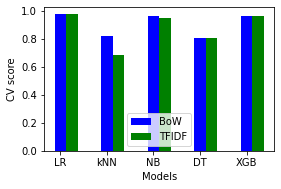

In [32]:
models=['LR','kNN','NB','DT','XGB']
tf_scores=[0.9808287192490612,0.8235925304245546,0.9623379005525852,0.8086901159792038,0.9641493567986401]
tfidf_scores=[0.9809038706502327,0.6876513321737748,0.9492653651017108,0.8083447219236749,0.9641930049332433]
X = np.arange(5)
fig = plt.figure()
fig.set_size_inches(3.2, 2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, tf_scores, color = 'b', width = 0.25)
ax.bar(X + 0.25, tfidf_scores, color = 'g', width = 0.25)
ax.set_xlabel('Models')
ax.set_ylabel('CV score')
plt.xticks(np.arange(5), models)
ax.legend(labels=['BoW', 'TFIDF'])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=10,solver='sag',max_iter=1000)
clf_lr.fit(X_train_tfidf, y_train)
pred=clf_lr.predict(X_test_tfidf)

In [ ]:
pred0=np.count_nonzero(pred == 0)
pred1=np.count_nonzero(pred == 1)
true0=np.count_nonzero(y_test == 0)
true1=np.count_nonzero(y_test == 1)

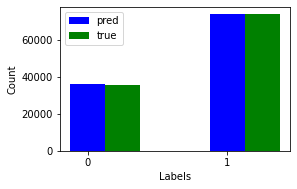

In [33]:
X = np.arange(2)
fig = plt.figure()
fig.set_size_inches(3.2, 2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, [pred0,pred1], color = 'b', width = 0.25)
ax.bar(X + 0.25, [true0,true1], color = 'g', width = 0.25)
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.xticks(np.arange(2), [0,1])
ax.legend(labels=['pred', 'true'])